<a href="https://colab.research.google.com/github/painterV/some_coding/blob/main/pagerank_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

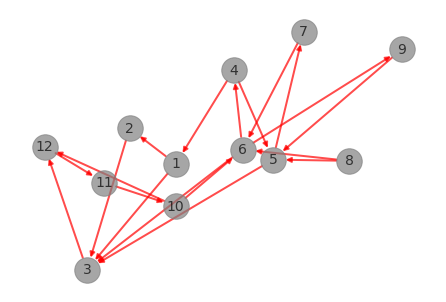

In [48]:
# !pip3 uninstall scipy
# !pip3 install 'scipy<1.8'
# !pip3 uninstall networkx
# !pip3 install 'networkx<2.7'

import networkx as nx               #载入networkx包
import matplotlib.pyplot as plt     #用于画图
G = nx.DiGraph()   #创建空的有向图
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])   # 添加节点 1-12
G.add_edges_from([(1,2),(1,3),(2,3),(3,12),(4,1),(4,5),(5,3), (5,7),(6,3),(6,4),(6,9),(7,6),(8,6),(8,5), (9,5),(10,6),(10,12),(11,10),(12,11)])   
# 添加多条连边，起点为“x”，终点为“y”
nx.draw(G, pos=nx.spring_layout(G), node_color = 'gray',node_size =650, alpha=0.7,edge_color = 'r', with_labels = True, font_size =14, width=2) # 修饰一下要画的图,包括节点颜色、节点大小、节点颜色透明度、边颜色、节点上标签字大小

In [34]:
#计算pr值
pr_dic = nx.pagerank(G)
#对各结点根据pr值由大到小排序
s = sorted(pr_dic.items(), key=lambda x: x[1], reverse=True)

In [35]:
print(s)

[(12, 0.17304613463509966), (11, 0.15958913849707296), (10, 0.14815321661650085), (6, 0.11914115971819006), (3, 0.11480254853024087), (5, 0.07679136541718702), (4, 0.04625646824877283), (9, 0.04625646824877283), (7, 0.04513611183682545), (1, 0.03215962180572901), (2, 0.026167766445608483), (8, 0.0125)]


In [54]:
def pagerank(G, max_iteration=1, d=0.85):
    #初始化每个节点的pr值为 1/n，n是节点数
    nodes = list(G.nodes) #获取图的所有节点
    pr_dict = {} #初始化dict存储每个node对应的pr值
    for nd in nodes:
        pr_dict[nd] = 1.0 / len(nodes) #初始化每个节点的pr值为 1/n
    
    old_pr_dict = pr_dict
    new_pr_dict = {}
    in_dict = {}
    out_dict = {}
    
    for nd in nodes:
        from_nodes = G.neighbors(nd)
        if nd not in out_dict:
            out_dict[nd] = set()
        for k in from_nodes:
            out_dict[nd].add(k)
            if k not in in_dict:
                in_dict[k] = set()
            in_dict[k].add(nd)
    # for k in out_dict:
        # print("current node:%s its out-neighbors: %s" % (k, ','.join([str(i) for i in list(out_dict[k])])))
    # for k in in_dict:
        # print("current node:%s its in-neighbors: %s" % (k, ','.join([str(i) for i in list(in_dict[k])])))
    
    for iter in range(max_iteration):
        for nd in nodes:
            #获取当前节点的入边的邻居
            if nd not in in_dict:
                new_pr_dict[nd] = (1-d) / len(nodes)
                continue
            in_nodes = in_dict[nd]
            tmp_pr = 0.0
            for ind in in_nodes:
                # print("iter:%d, update node:%d, contribute node:%d" % (iter, nd, ind))
                tmp_pr += (1.0 / len(out_dict[ind])) * old_pr_dict[ind]
            new_pr_dict[nd] = (1-d)/len(nodes) + d* tmp_pr
        old_pr_dict = new_pr_dict

    #对各结点根据pr值由大到小排序
    new_pr_dict = sorted(new_pr_dict.items(), key=lambda x: x[1], reverse=True)
    sum = 0
    for k in new_pr_dict:
        sum += k[1]
    print(sum)
    return new_pr_dict
print("Networkx pagerank:", s)
print("自定义实现的pagerank: ", pagerank(G, 100))

Networkx pagerank: [(12, 0.17304613463509966), (11, 0.15958913849707296), (10, 0.14815321661650085), (6, 0.11914115971819006), (3, 0.11480254853024087), (5, 0.07679136541718702), (4, 0.04625646824877283), (9, 0.04625646824877283), (7, 0.04513611183682545), (1, 0.03215962180572901), (2, 0.026167766445608483), (8, 0.0125)]
0.9999999999874665
自定义实现的pagerank:  [(12, 0.17304684097133455), (11, 0.15958981482514992), (10, 0.1481513426008559), (6, 0.1191422590738699), (3, 0.11480296513643622), (5, 0.07679014109027309), (9, 0.046256973404263144), (4, 0.04625697340413575), (7, 0.045135809963366066), (1, 0.03215921369668913), (2, 0.02616766582109288), (8, 0.012500000000000002)]
